In [35]:
from pyalgotrade.feed import csvfeed

feed = csvfeed.Feed("Date", "%Y-%m-%d")
feed.addValuesFromCSV(r"example\data\quandl_gold_2.csv")
#是一个迭代器，并不是一次算出来。
for dateTime, value in feed:
    print dateTime, value


1968-04-07 00:00:00 {'USD': 37.0, 'GBP': 15.3875, 'EUR': ''}
1968-04-14 00:00:00 {'USD': 38.0, 'GBP': 15.8208, 'EUR': ''}
1968-04-21 00:00:00 {'USD': 37.65, 'GBP': 15.6833, 'EUR': ''}
1968-04-28 00:00:00 {'USD': 38.65, 'GBP': 16.1271, 'EUR': ''}
1968-05-05 00:00:00 {'USD': 39.1, 'GBP': 16.3188, 'EUR': ''}
1968-05-12 00:00:00 {'USD': 39.6, 'GBP': 16.5625, 'EUR': ''}
1968-05-19 00:00:00 {'USD': 41.5, 'GBP': 17.3958, 'EUR': ''}
1968-05-26 00:00:00 {'USD': 41.75, 'GBP': 17.5104, 'EUR': ''}
1968-06-02 00:00:00 {'USD': 41.95, 'GBP': 17.6, 'EUR': ''}
1968-06-09 00:00:00 {'USD': 41.25, 'GBP': 17.3042, 'EUR': ''}
1968-06-16 00:00:00 {'USD': 41.0, 'GBP': 17.1875, 'EUR': ''}
1968-06-23 00:00:00 {'USD': 41.05, 'GBP': 17.2229, 'EUR': ''}
1968-06-30 00:00:00 {'USD': 40.9, 'GBP': 17.1667, 'EUR': ''}
1968-07-07 00:00:00 {'USD': 41.0, 'GBP': 17.2083, 'EUR': ''}
1968-07-14 00:00:00 {'USD': 39.3, 'GBP': 16.4396, 'EUR': ''}
1968-07-21 00:00:00 {'USD': 38.7, 'GBP': 16.1854, 'EUR': ''}
1968-07-28 00:00:00 {

In [3]:
type(feed)

pyalgotrade.feed.csvfeed.Feed

In [4]:
dir(feed)

['_BaseFeed__ds',
 '_BaseFeed__event',
 '_BaseFeed__maxLen',
 '_BaseFeed__rowFilter',
 '_BaseFeed__rowParser',
 '_Feed__rowParser',
 '_MemFeed__nextIdx',
 '_MemFeed__values',
 '_Subject__dispatchPrio',
 '__abstractmethods__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__iter__',
 '__metaclass__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 'addValues',
 'addValuesFromCSV',
 'createDataSeries',
 'dispatch',
 'eof',
 'getDispatchPriority',
 'getKeys',
 'getNewValuesEvent',
 'getNextValues',
 'getNextValuesAndUpdateDS',
 'join',
 'onDispatcherRegistered',
 'peekDateTime',
 'registerDataSeries',
 'reset',
 'setDateRange',
 'setDispatchPriority',
 'setRowFilter',
 'setTimeDelta',
 'start'

In [9]:
feed.getKeys()

['USD', 'GBP', 'EUR']

In [11]:
import pandas as pd
pf=pd.read_csv(r"example\data\quandl_gold_2.csv")
pf.head()

,Date,USD,GBP,EUR
0,2013-09-29,1333.00,831.203,986.750
1,2013-09-22,1349.25,842.755,997.671
2,2013-09-15,1318.50,831.546,993.969
3,2013-09-08,1387.00,886.885,1052.911
4,2013-09-01,1394.75,901.292,1055.749


In [15]:
feed['USD'][2:6]

[375.95, 386.65, 386.55, 391.3]

In [19]:
import numpy as np
np.where(feed['USD'][0]==pf['USD'])

(array([1023], dtype=int64),)

In [38]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


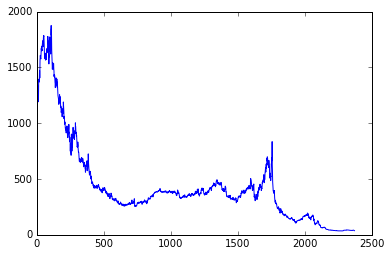

In [42]:
plot(pf.USD)

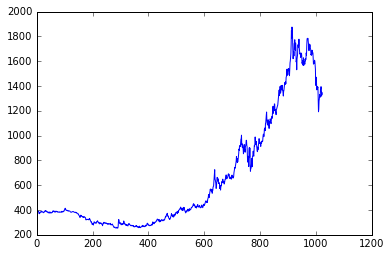

In [43]:
plot(feed["USD"])

In [46]:
from pyalgotrade.dataseries import SequenceDataSeries as pdsd
pdsd?


In [47]:
data=pdsd()
dir(data)

['_SequenceDataSeries__dateTimes',
 '_SequenceDataSeries__newValueEvent',
 '_SequenceDataSeries__values',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__len__',
 '__metaclass__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 'append',
 'appendWithDateTime',
 'getDateTimes',
 'getMaxLen',
 'getNewValueEvent',
 'getValueAbsolute',
 'setMaxLen']

In [51]:
data.appendWithDateTime(pf.Date,pf.iloc[:,1:])

In [58]:
data.getDateTimes()[0][2]

'2013-09-15'

In [66]:
dir(data.getNewValueEvent())

['_Event__applyChanges',
 '_Event__emitting',
 '_Event__handlers',
 '_Event__toSubscribe',
 '_Event__toUnsubscribe',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'emit',
 'subscribe',
 'unsubscribe']

TypeError: 'Event' object is not iterable